<a href="https://colab.research.google.com/github/JungyuBaeck/Jungyu-astron1221/blob/main/Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.units as u
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

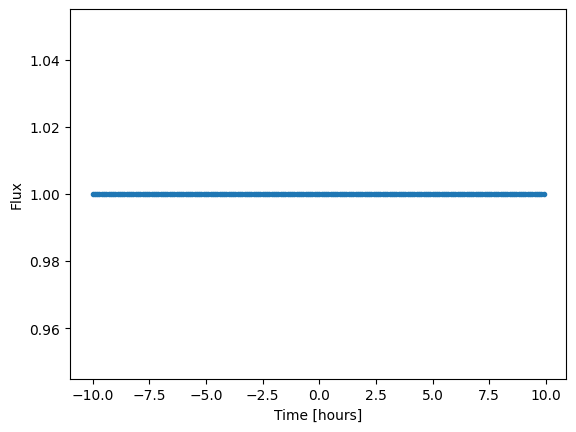

In [ ]:
time_arr = np.arange(-10,10,0.1) * u.hour #Array of time value
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 #Array of flux with 1.0
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") #plotting flux x time
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [ ]:
tau = 2.0 * u.hour # Duration of transit
t_0 = 1.0 * u.hour # Time of transit center
time_start = t_0 - tau / 2 # Start time of transit
time_end = t_0 + tau / 2 # End time of transit
print(time_start, time_end)

0.0 h 2.0 h


In [ ]:
for i in range(len(time_arr)):
    if i <10: # Loop through the first 10 elements of time_arr and print their index and value
        print("index =", i , "value = ", time_arr[i])

index = 0 value =  -10.0 h
index = 1 value =  -9.9 h
index = 2 value =  -9.8 h
index = 3 value =  -9.700000000000001 h
index = 4 value =  -9.600000000000001 h
index = 5 value =  -9.500000000000002 h
index = 6 value =  -9.400000000000002 h
index = 7 value =  -9.300000000000002 h
index = 8 value =  -9.200000000000003 h
index = 9 value =  -9.100000000000003 h


In [ ]:
ind = np.where(((time_arr >= time_start) & (time_arr <= time_end))) # Find ind of time array within transit duraiton
print(ind)

(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120]),)


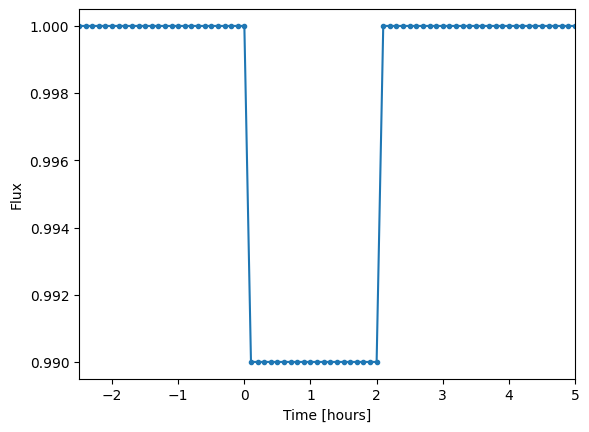

In [ ]:
delta = 0.01 # Depth of transit
flux_arr[ind] = 1.0 - delta # Set flux during transit
plt.plot(time_arr, flux_arr, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5,5.0)
plt.show()

In [ ]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # Define a function to make a transit lightcurve
  time_start = t_0 - tau / 2
  time_end = t_0 + tau / 2
  ind = np.where(((time_arr >= time_start) & (time_arr <= time_end)))
  flux_arr[ind] = 1.0 - delta
  return flux_arr

In [ ]:
# Generate a transit lightcurve with different parameters
time_arr = np.arange(-10,10,0.1) * u.hour
tau = 4.0 * u.hour
t_0 = 2.0 * u.hour
delta = 0.99

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)

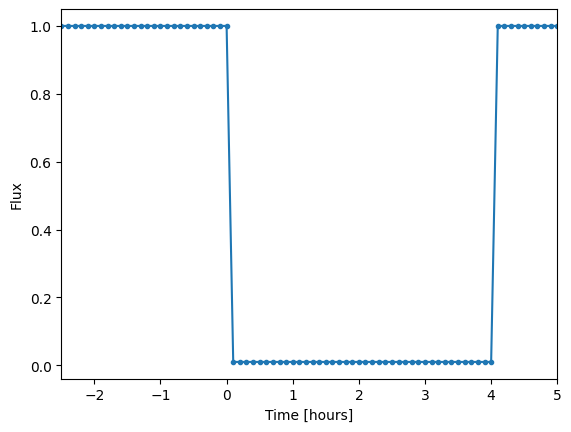

In [ ]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5,5.0)
# plt.ylim(0.02)
plt.show()
#

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gj436.tbl to gj436 (1).tbl


In [ ]:
import astropy.io.ascii
dat = astropy.io.ascii.read("gj436.tbl")

In [ ]:
dat

set,HJD,Relative_Flux
int64,float64,float64
0,2454280.6858131,0.99858714
0,2454280.6861306,0.99893544
0,2454280.6864482,1.0005495
0,2454280.6867663,0.9992087
0,2454280.6870839,0.9999951
0,2454280.6873985,0.99963366
0,2454280.6877158,0.99984715
0,2454280.6880337,0.99940892
0,2454280.6883513,1.0007346


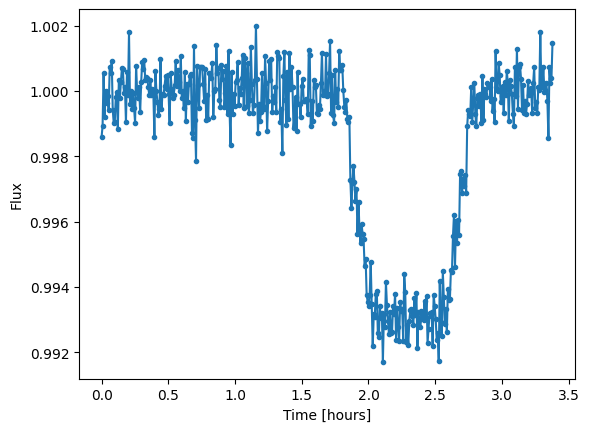

In [ ]:
time_obs = dat["HJD"] # derive HJD values in data
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"] # derive flux values in data
plt.plot(time_obs, flux_obs, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [ ]:
# Generate a transit lightcurve with different parameters

t_0 = 2.3 * u.hour
tau = 1.0 * u.hour
delta = 0.008

flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)

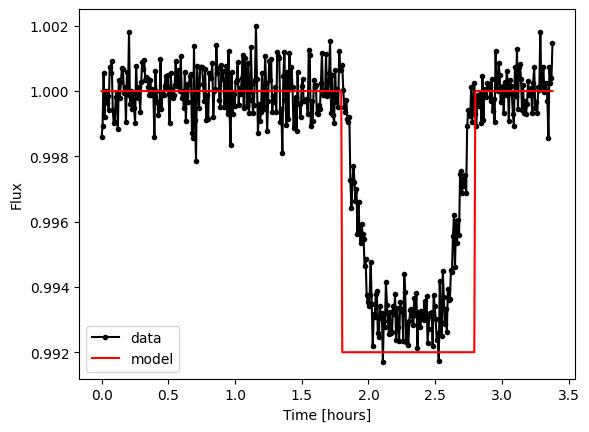

In [ ]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # Plot the red model lightcurve on the same plot
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WASP-2.tbl to WASP-2 (1).tbl


In [ ]:
import astropy.io.ascii
dat = astropy.io.ascii.read("WASP-2.tbl")

In [ ]:
dat

set,HJD,Relative_Flux
int64,float64,float64
0,2454008.60531,0.99881
0,2454008.60578,1.00044
0,2454008.60627,0.99805
0,2454008.60676,1.00318
0,2454008.60724,0.99741
0,2454008.60771,0.9996
0,2454008.60819,0.99839
0,2454008.60866,1.00076
0,2454008.60914,1.00106


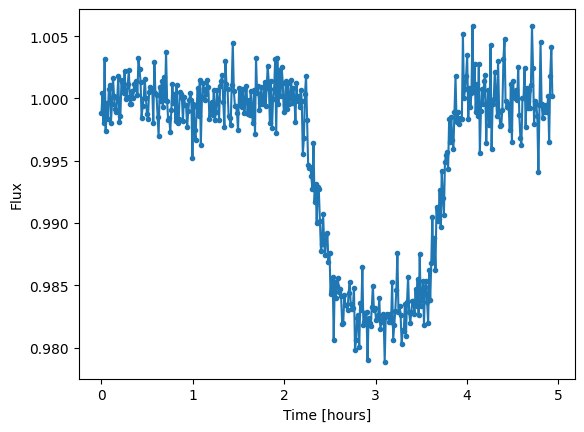

In [ ]:
# Derive data of WASP-2
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, linestyle="-", marker=".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [ ]:
# Generate a transit lightcurve with different parameters
t_0 = 3.05 * u.hour
tau = 1.6 * u.hour
delta = 0.0183

flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)

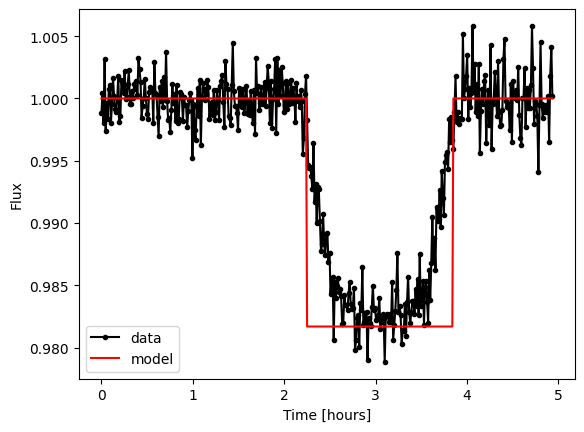

In [ ]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # Plot the red model lightcurve on the same plot
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show()

In [ ]:
def chi2_calc(flux_obs, flux_model, err):
  return np.sum(((flux_obs - flux_model) / err)**2)

# Assuming 'err' is the uncertainty in the flux_obs data
# Replace this with your actual error values
err = np.ones_like(flux_obs) * 0.01  # Constant error of 0.01

chi2 = chi2_calc(flux_obs, flux_model, err)
print("Chi-squared value:", chi2)

# Varying parameters and calculate reduced chi-squared
n_data_points = len(flux_obs)
n_parameters = 3  # Number of free parameters (t_0, tau, delta)

reduced_chi2 = chi2 / (n_data_points - n_parameters)
print("Reduced Chi-squared:", reduced_chi2)


Chi-squared value: 63.97075399999977
Reduced Chi-squared: 0.1512310969267134
